# 层次聚类

## 数据集

In [38]:
import pandas as pd

df = pd.read_csv("./protein.csv", header=0)

df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


# 聚类

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

X = df.to_numpy()[:, 1:]
country_names = df.to_numpy()[:, 0]

# 聚类
linkage_matrix = linkage(
    X, # 数据集
    method="ward", # 度量两个类簇间的相似度的方法，有: single、average、complete、ward
)


## 画树状图

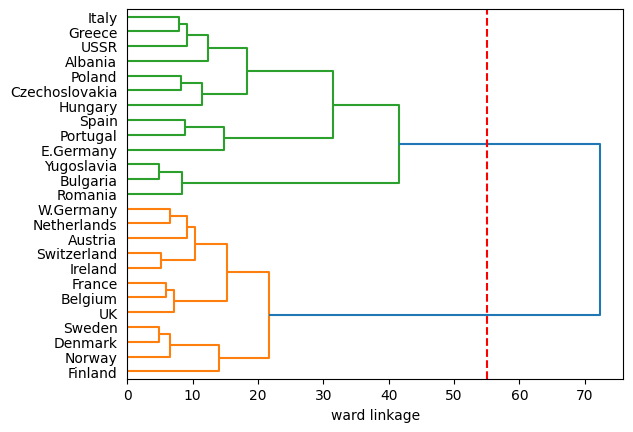

In [40]:
# 画树状图
dendrogram(
    Z=linkage_matrix, # 链接矩阵
    labels=country_names, # 叶子节点的标签
    orientation="right", # 树根所在方向
)
plt.xlabel("ward linkage")
plt.axvline(55, linestyle="--", color="red")
plt.show()

## 生成标签

In [43]:
fcluster(linkage_matrix, t=55, criterion="distance")

array([2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2], dtype=int32)